<a href="https://colab.research.google.com/github/Varun0801/Deep_Learning_Essentials/blob/master/Convolutional_Neural_Networks_Understanding_CNN_Layer_Operations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageOps

In [3]:
img = ImageOps.grayscale(Image.open('lion.jpg'))
img_arr = np.array(img)


In [4]:
img_arr, img_arr.shape

(array([[45, 50, 56, ..., 52, 45, 40],
        [53, 56, 57, ..., 50, 49, 49],
        [53, 52, 49, ..., 42, 46, 50],
        ...,
        [10, 10, 11, ..., 12,  9,  7],
        [ 9,  9, 10, ..., 12,  9,  7],
        [ 8,  9,  9, ..., 12,  9,  7]], dtype=uint8), (1080, 1080))

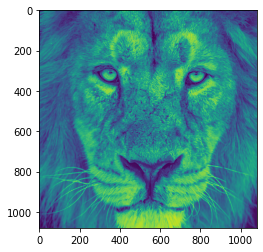

In [7]:
plt.imshow(img_arr);


In [8]:
#Implement a Convolution-2D Layer
def conv2d(image_arr, conv_filter):
    # copy image
    image_copy = np.copy(image_arr)
    # get image dims
    size_x, size_y = image_copy.shape

    # for each pixel (x, y) in the image
    for x in range(1,size_x-1):
        for y in range(1,size_y-1):
            # initial convolution ops result = 0
            convolution = 0.0
            # apply convolution on 3x3 patch of image with 3x3 filter \ kernel
            #   Source Image Patch (3x3)           Convolution Filter (3x3)     New Image - position (x,y) 
            # [x-1, y-1] [x, y-1] [x+1, y-1]      [f(0,0)] [f(0,1)] [f(0,2)]
            # [x-1, y  ] [ x, y ] [x+1, y  ]  *   [f(1,0)] [f(1,1)] [f(1,2)]     =    [NI(x, y)]
            # [x-1, y+1] [x, y+1] [x+1, y+1]      [f(2,0)] [f(2,1)] [f(2,2)]
            convolution = convolution + (image_arr[x - 1, y-1] * conv_filter[0][0])
            convolution = convolution + (image_arr[x, y-1] * conv_filter[0][1])
            convolution = convolution + (image_arr[x + 1, y-1] * conv_filter[0][2])

            convolution = convolution + (image_arr[x-1, y] * conv_filter[1][0])
            convolution = convolution + (image_arr[x, y] * conv_filter[1][1])
            convolution = convolution + (image_arr[x+1, y] * conv_filter[1][2])
            
            convolution = convolution + (image_arr[x-1, y+1] * conv_filter[2][0])
            convolution = convolution + (image_arr[x, y+1] * conv_filter[2][1])
            convolution = convolution + (image_arr[x+1, y+1] * conv_filter[2][2])
            filter_wt_sum = np.sum(conv_filter)
            # normalize to make filter weights add up to 1
            weight = 1 if filter_wt_sum == 0 else 1./filter_wt_sum
            convolution = convolution * weight
            # clip max \ min pixels
            if(convolution<0):
                convolution = 0
            if(convolution>255):
                convolution = 255
            # assign convolution ops result to new image pixel image_copy(x, y)
            image_copy[x, y] = convolution

    return image_copy


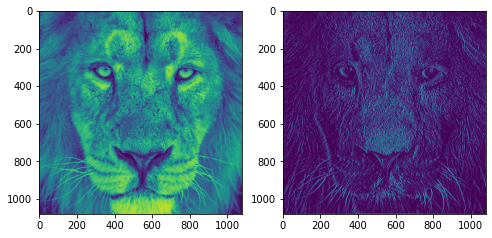

In [12]:
# Edge Detection - Sobel G_y (vertical edges)
conv_res = conv2d(image_arr=img_arr, conv_filter=[[-1, -2, -1], 
                                              [0, 0, 0], 
                                              [1, 2, 1]])
f, ax = plt.subplots(1,2, figsize=(8,12))
ax[0].imshow(img_arr)
ax[1].imshow(conv_res)

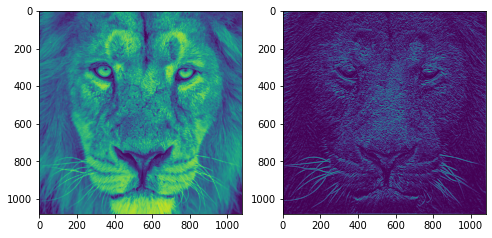

In [13]:
# Edge Detection - Sobel G_x (horizontal edges)
conv_res = conv2d(image_arr=img_arr, conv_filter=[[-1, 0, 1], 
                                                  [-2, 0, 2], 
                                                  [-1, 0, 1]])
f, ax = plt.subplots(1,2, figsize=(8,12))
ax[0].imshow(img_arr);
ax[1].imshow(conv_res);

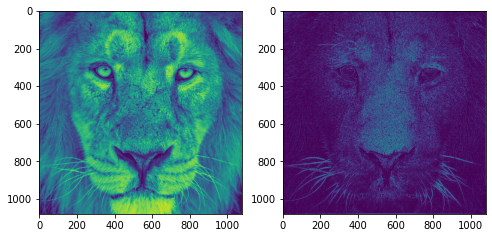

In [14]:
# Edge Detection: Outline kernel
conv_res = conv2d(image_arr=img_arr, conv_filter=[[-1, -1, -1], 
                                                  [-1, 8, -1], 
                                                  [-1, -1, -1]])
f, ax = plt.subplots(1,2, figsize=(8,12))
ax[0].imshow(img_arr);
ax[1].imshow(conv_res);

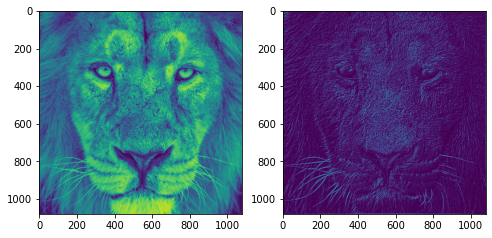

In [15]:
# Emboss Kernel
conv_res = conv2d(image_arr=img_arr, conv_filter=[[-1, -1, 0], 
                                                  [-1, 0, 1], 
                                                  [0, 1, 1]])
f, ax = plt.subplots(1,2, figsize=(8,12))
ax[0].imshow(img_arr);
ax[1].imshow(conv_res);

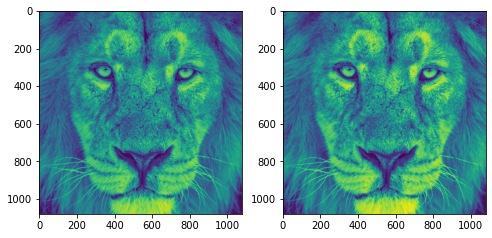

In [16]:
# Gaussian Blur Kernel
conv_res = conv2d(image_arr=img_arr, conv_filter=np.array([[1, 2, 1], 
                                                           [2, 4, 2], 
                                                           [1, 2, 1]])/16.)
f, ax = plt.subplots(1,2, figsize=(8,12))
ax[0].imshow(img_arr);
ax[1].imshow(conv_res);

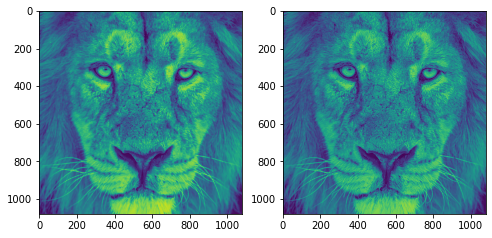

In [17]:
# Sharpen Kernel
conv_res = conv2d(image_arr=img_arr, conv_filter=[[0, -1, 0], 
                                                  [-1, 5, -1], 
                                                  [0, -1, 0]])
f, ax = plt.subplots(1,2, figsize=(8,12))
ax[0].imshow(img_arr);
ax[1].imshow(conv_res);

In [18]:
def maxpooling2d(image_arr):
    # get image dims
    size_x, size_y = image_arr.shape
    # generate new image
    new_size_x, new_size_y = size_x // 2, size_y // 2
    image_new = np.zeros((new_size_x, new_size_y))
    # for each pixel (x, y) in the image with interval of 2
    for x in range(0, size_x-1, 2):
        for y in range(0, size_y-1, 2):
            # initial pixel values = []
            pixels = []
            # apply max pool on 2x2 patch of image 
            #  Image Patch (2x2)              
            # [ x, y ] [x+1, y  ]    
            # [x, y+1] [x+1, y+1]      
            pixels.append(image_arr[x, y])
            pixels.append(image_arr[x+1, y])

            pixels.append(image_arr[x, y+1])
            pixels.append(image_arr[x+1, y+1])
            # take max of pixels to assign to new image pixel image_new(x, y)
            image_new[x//2, y//2] = max(pixels)

    return image_new

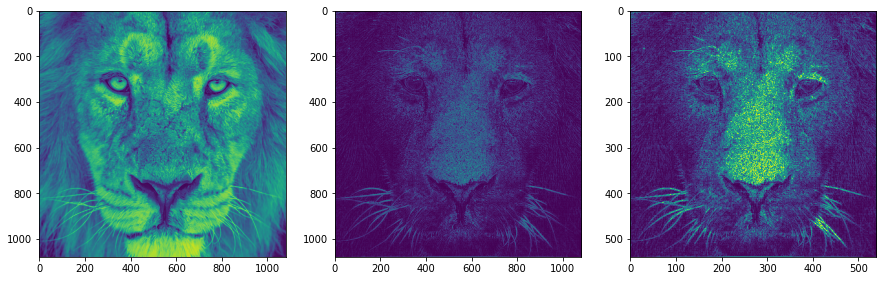

In [19]:
# Maxpooling2D Examples
conv_res = conv2d(image_arr=img_arr, conv_filter=[[-1, -1, -1], 
                                                  [-1, 8, -1], 
                                                  [-1, -1, -1]])
pool_res = maxpooling2d(conv_res)
f, ax = plt.subplots(1,3, figsize=(15, 15))
ax[0].imshow(img_arr);
ax[1].imshow(conv_res);
ax[2].imshow(pool_res);

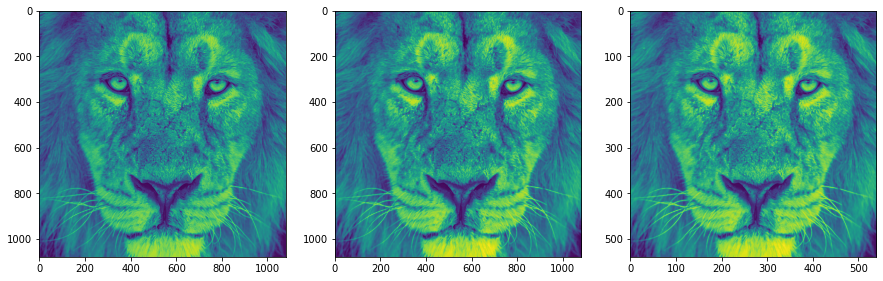

In [20]:
conv_res = conv2d(image_arr=img_arr, conv_filter=np.array([[1, 2, 1], 
                                                           [2, 4, 2], 
                                                           [1, 2, 1]])/16.)
pool_res = maxpooling2d(conv_res)
f, ax = plt.subplots(1,3, figsize=(15, 15))
ax[0].imshow(img_arr);
ax[1].imshow(conv_res);
ax[2].imshow(pool_res);

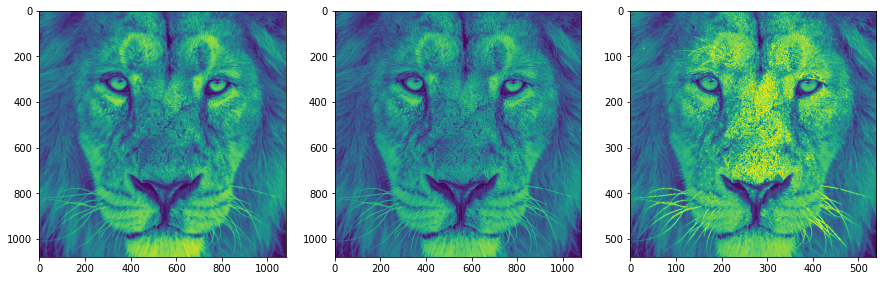

In [21]:
conv_res = conv2d(image_arr=img_arr, conv_filter=[[0, -1, 0], 
                                                  [-1, 5, -1], 
                                                  [0, -1, 0]])
pool_res = maxpooling2d(conv_res)
f, ax = plt.subplots(1,3, figsize=(15, 15))
ax[0].imshow(img_arr);
ax[1].imshow(conv_res);
ax[2].imshow(pool_res);